# Train OCR text Detector quick example

In [1]:
import os
import sys
import torch
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../../../../')
sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.text_detectors.base.ocr import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
#info = modelhub.download_dataset_for_model("Ge")
#PATH_TO_DATASET = info["dataset_path"]

# local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/TextDetector/ocr_example")

In [5]:
PATH_TO_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/TextDetector/ocr_example'

In [6]:
DATASET_NAME = "ge"
VERSION = f"{datetime.now().strftime('%Y_%m_%d')}_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/mnt/data/var/www/nomeroff-net/models/anpr_ocr_ge_2022_03_24_pytorch_lightning.ckpt'

In [11]:
class ge(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I",
                        "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


        # Train hyperparameters
        self.batch_size = 4
        self.epochs = 5
        self.gpus = torch.cuda.device_count()

In [12]:
ocrTextDetector = ge()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=1)

100%|██████████| 4/4 [00:00<00:00, 10727.12it/s]

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'1', '-', 'B', '2', 'C', '9', '7', 'H', 'X', '3', 'M', '8', '0', 'S', 'K', '6', 'A', ' ', '4'}
Letters val  {'1', '-', 'B', '2', 'C', '9', '7', 'H', 'X', '3', 'M', '8', '0', 'S', 'K', '6', 'A', ' ', '4'}
Letters test  {'1', '-', 'B', '2', 'C', '9', '7', 'H', 'X', '3', 'M', '8', '0', 'S', 'K', '6', 'A', ' ', '4'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters:   - 0 1 2 3 4 6 7 8 9 A B C H K M S X
START BUILD DATA



100%|██████████| 4/4 [00:00<00:00, 2839.26it/s]

DATA PREPARED


2022-03-24 17:15:49,213 [1539110] ERROR    pytorch_lightning.tuner.lr_finder:181: [JupyterRequire] Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 5, in gradient
  File "/usr/local/lib64/python3.8/site-packages/numpy/lib/function_base.py", line 1041, in gradient
    raise ValueError(
ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
2022-03-24 17:15:49,233 [1539110] ERROR    pytorch_lightning.tuner.lr_finder:181: [JupyterRequire] Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.g

Found lr: None



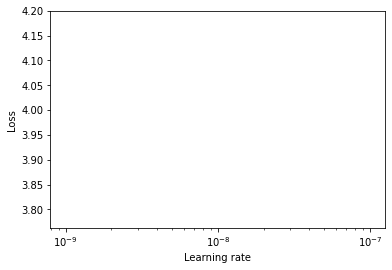

In [13]:
# # tune
# lr_finder = ocrTextDetector.tune()
#
# # Plot with
# fig = lr_finder.plot(suggest=True)
# fig.show()

In [14]:
ocrTextDetector.train()

2022-03-24 17:15:52,058 [1539110] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:167: LightningDeprecationWarning: Setting `Trainer(weights_summary=None)` is deprecated in v1.5 and will be removed in v1.7. Please set `Trainer(enable_model_summary=False)` instead.
  rank_zero_deprecation(

2022-03-24 17:15:52,065 [1539110] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(



2022-03-24 17:15:57,650 [1539110] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(




[INFO] best model path /mnt/data/var/www/nomeroff-net/nomeroff_net/text_detectors/data/logs/ocr/epoch=4-step=4-v81.ckpt


NPOcrNet(
  (cnn): BlockCNN(
    (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (gru1): BlockRNN(
    (gru): LSTM(512, 32, batch_first=True, bidirectional=True)
  )
  (gru2): BlockRNN(
    (gru): LSTM(32, 32, batch_first=True, bidirectional=True)
  )
  (linear2): Linear(in_features=64, out_features=20, bias=True)
  (criterion): CTCLoss()
)

In [15]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /mnt/data/var/www/nomeroff-net/models/anpr_ocr_ge_2022_03_24_pytorch_lightning.ckpt


In [16]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (cnn): BlockCNN(
    (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (gru1): BlockRNN(
    (gru): LSTM(512, 32, batch_first=True, bidirectional=True)
  )
  (gru2): BlockRNN(
    (gru): LSTM(32, 32, batch_first=True, bidirectional=True)
  )
  (linear2): Linear(in_features=64, out_features=20, bias=True)
)

In [17]:
ocrTextDetector.test_acc(verbose=True)
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)


[INFO] /mnt/data/var/www/nomeroff-net/./data/dataset/TextDetector/ocr_example/test/img/AA0013BM.png
Predicted:  			 True: aa0013bm

[INFO] /mnt/data/var/www/nomeroff-net/./data/dataset/TextDetector/ocr_example/test/img/0038SC-0.png
Predicted:  			 True: 0038sc

[INFO] /mnt/data/var/www/nomeroff-net/./data/dataset/TextDetector/ocr_example/test/img/10001_2914KC7_0.png
Predicted:  			 True: 2914 kc-7

[INFO] /mnt/data/var/www/nomeroff-net/./data/dataset/TextDetector/ocr_example/test/img/1000_X371HK96_0.png
Predicted:  			 True: x371hk96
Testing Accuracy:  0.0


0.0

## than train with augumentation

In [21]:
for i in range(0,1):
    # Train next 2 epochs on augumentated dataset
    ocrTextDetector.epochs += 2

    # prepare with augumentation
    ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=1, seed=i)

    # Plot with
    #fig = lr_finder.plot(suggest=True)
    #fig.show()
    model = ocrTextDetector.train(seed=i, ckpt_path=RESULT_MODEL_PATH)
    ocrTextDetector.test_acc(verbose=False)
    ocrTextDetector.save(RESULT_MODEL_PATH)